In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#Regressions
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#Preprocessament
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

## - Exercici 1

Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt

In [83]:
df = pd.read_csv('housing data.csv', header=None)
df.columns = ["CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B_1000", "LSTAT", "MEDV"]
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B_1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B_1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


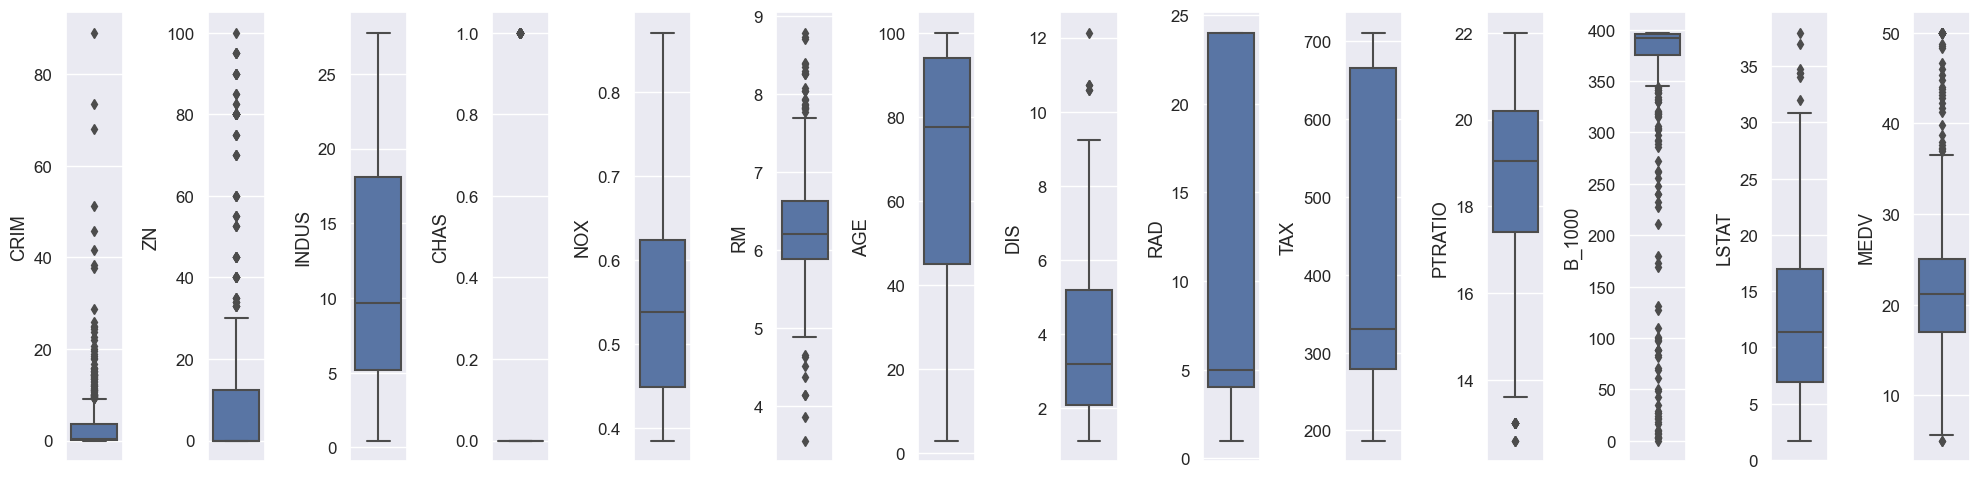

In [86]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(h_pad=5.0)

### Prepocessament

Per als Features amb molts Outliers utilitzarem RobustScaler, escalant segons el rang de quartils.
'CHAS'no farem res perquè és binaria. I la resta aplicarem normalització MinMaxScaler

In [87]:
columnsRobust =  ['CRIM', 'ZN', 'RM', 'B_1000', 'LSTAT']
scaler = RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])

columnsNorm = ['INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
scaler = MinMaxScaler().fit(df[columnsNorm])
df[columnsNorm] = scaler.transform(df[columnsNorm])

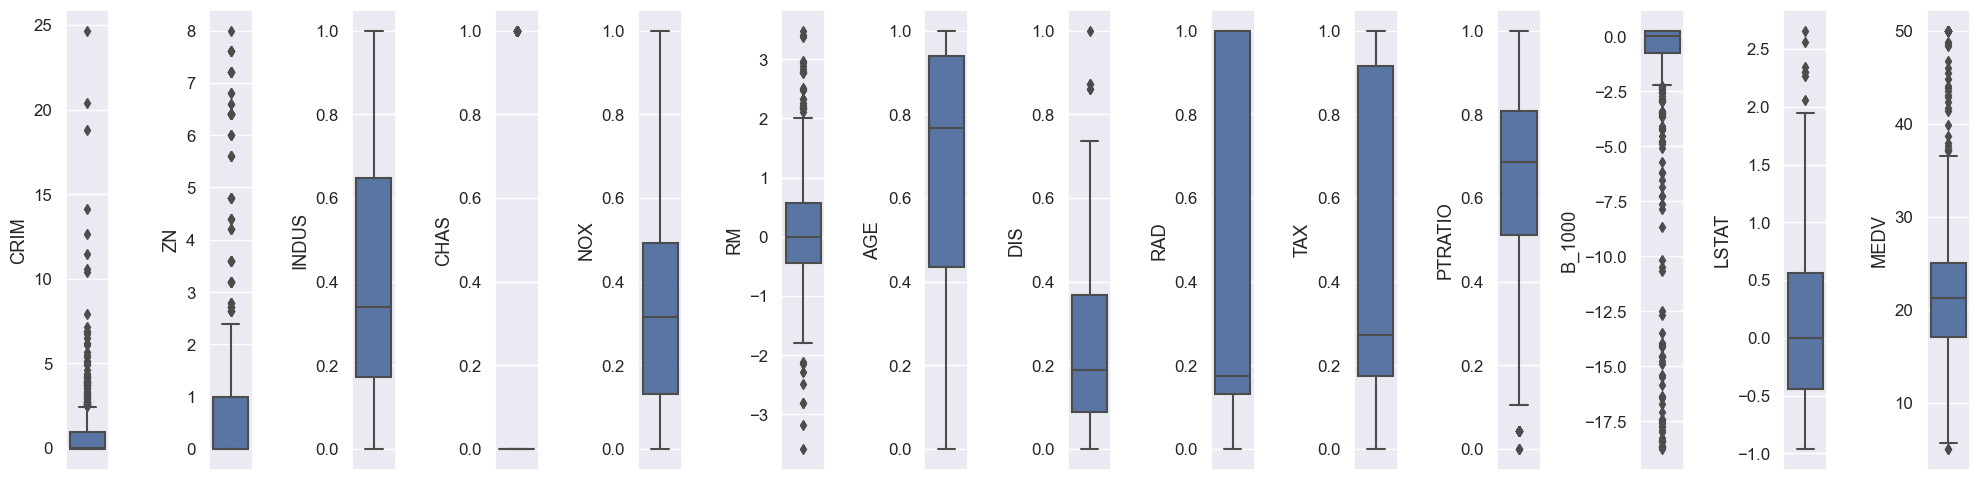

In [88]:
fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(20, 5))
index = 0
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(h_pad=5.0)

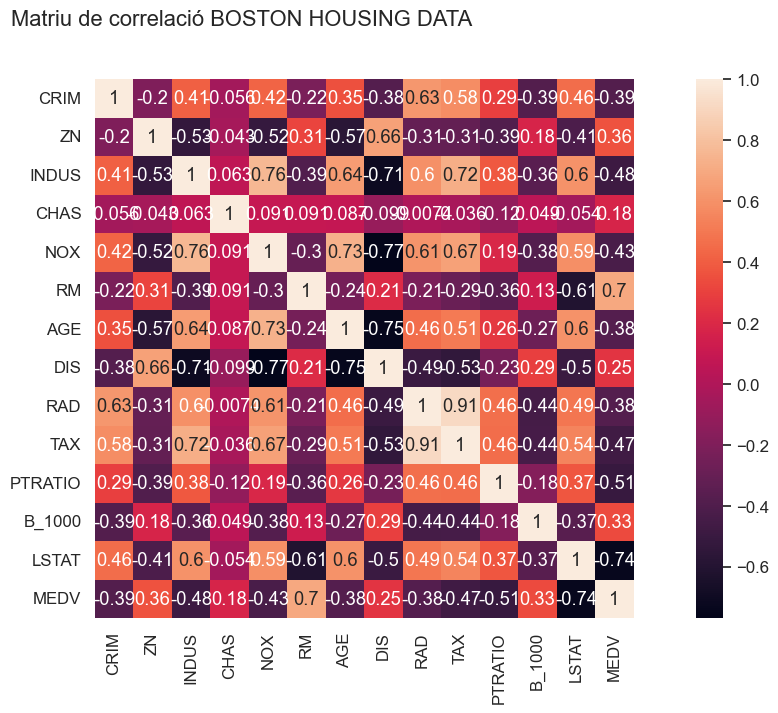

In [89]:
corr=df.corr()

fig,axs =plt.subplots(figsize=(16,7))
sns.set(font_scale=1.1)
fig.suptitle('Matriu de correlació BOSTON HOUSING DATA')

sns.heatmap(corr, square=True, annot=True)

plt.show()

Observem que LSTAT i RM tenen una correlació alta amb la variable objectiu MEDV. I DIS amb INDUS i NOX.

### Train/Test

In [90]:
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15)

#### Model de Regressió Lineal

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred_lr = lr.predict(X_test)

#### Model de Regressió SVR (Support Verctor Regression)

In [93]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [94]:
y_pred_svr = svr.predict(X_test)

#### Model de Regressió: Decision Tree Regression

In [95]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
y_pred_dt = dt.predict(X_test)

### - Exercici 2

Compara’ls en base al MSE i al R2.

In [97]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

r2_lr, mse_lr

(0.6920749038652139, 23.812245465080707)

In [98]:
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

r2_svr, mse_svr

(0.6824555379166153, 24.556123460287072)

In [99]:
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

r2_dt, mse_dt

(0.6787326446244628, 24.844019607843137)

In [100]:
models = pd.DataFrame( data = [('Linear Regression', r2_lr, mse_lr), 
                                  ('Support Vector Regression', r2_svr, mse_svr), 
                                  ('Decision Tree Regression', r2_dt, mse_dt)],
                         columns = ['Model', 'R2', 'MSE'])

models

,Model,R2,MSE
0,Linear Regression,0.692075,23.812245
1,Support Vector Regression,0.682456,24.556123
2,Decision Tree Regression,0.678733,24.844020


Segons resultats obtinguts el model que millors resultats té és Linear Regression, ja que té el R2 més proper a 1 i el MSE més proper a 0.

### - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

In [101]:
lr = LinearRegression(positive=True)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr2 = r2_score(y_test, y_pred_lr)
mse_lr2 = mean_squared_error(y_test, y_pred_lr)

r2_lr, r2_lr2, mse_lr, mse_lr2

(0.6920749038652139, 0.5337889596579037, 23.812245465080707, 36.05270200613087)

In [102]:
lr_comp = pd.DataFrame( data = [('Linear Regression_original', r2_lr, mse_lr), 
                                  ('Linear Regression_parametres', r2_lr2, mse_lr2),],
                         columns = ['Model', 'R2', 'MSE'])
lr_comp

,Model,R2,MSE
0,Linear Regression_original,0.692075,23.812245
1,Linear Regression_parametres,0.533789,36.052702


No s'ha trobat paràmetres que millorin l'original en el cas de LR.

In [103]:
svr = SVR(C=15.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

r2_svr2 = r2_score(y_test, y_pred_svr)
mse_svr2 = mean_squared_error(y_test, y_pred_svr)

r2_svr, r2_svr2, mse_svr, mse_svr2

(0.6824555379166153, 0.8219240167243084, 24.556123460287072, 13.77084582719512)

In [104]:
svr_comp = pd.DataFrame( data = [('Support Vector Regression_original', r2_svr, mse_svr), 
                                  ('Support Vector Regression_parametres', r2_svr2, mse_svr2)],
                         columns = ['Model', 'R2', 'MSE'])
svr_comp

,Model,R2,MSE
0,Support Vector Regression_original,0.682456,24.556123
1,Support Vector Regression_parametres,0.821924,13.770846


En aquest cas si s'ha aconseguit millorar el model SVR modificant els paràmetres C i epsilon.

In [105]:
dt = DecisionTreeRegressor(max_leaf_nodes = 12)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_dt2 = r2_score(y_test, y_pred_dt)
mse_dt2 = mean_squared_error(y_test, y_pred_dt)

r2_dt, r2_dt2, mse_dt, mse_dt2

(0.6787326446244628,
 0.7573414271966142,
 24.844019607843137,
 18.765100903861065)

In [106]:
dt_comp = pd.DataFrame( data = [('Decision Tree Regression_original', r2_dt, mse_dt),
                                ('Decision Tree Regression_parametres', r2_dt2, mse_dt2),],
                         columns = ['Model', 'R2', 'MSE'])
dt_comp

,Model,R2,MSE
0,Decision Tree Regression_original,0.678733,24.844020
1,Decision Tree Regression_parametres,0.757341,18.765101


En cas també hem aconseguit millorar el DTR modificant el paràmetre max de nº de fulles de l'abre a 12.

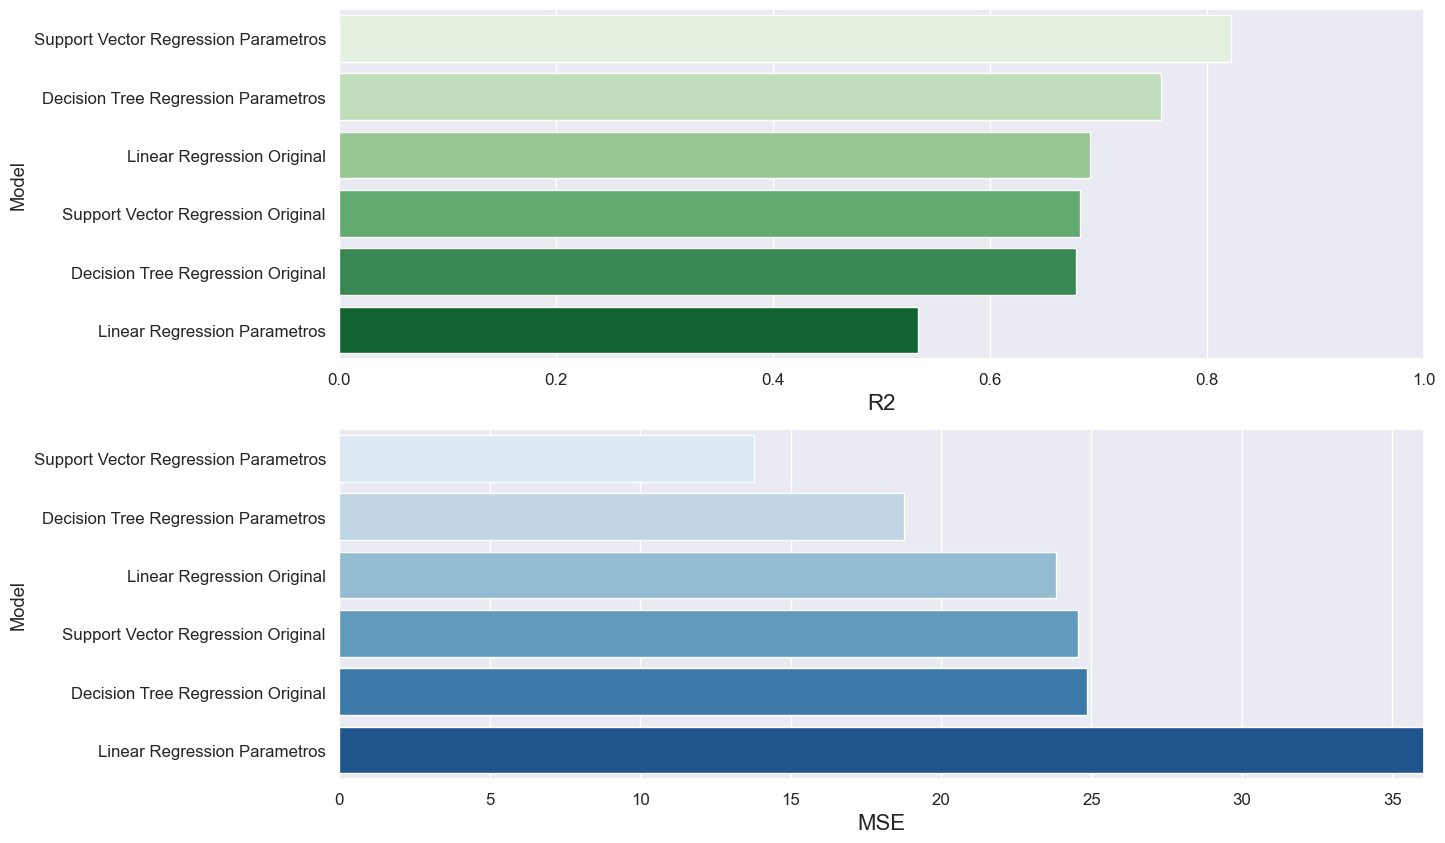

In [107]:
models = pd.DataFrame( data = [('Linear Regression Original', r2_lr, mse_lr), 
                             ('Linear Regression Parametros', r2_lr2, mse_lr2),
                             ('Support Vector Regression Original', r2_svr, mse_svr), 
                             ('Support Vector Regression Parametros', r2_svr2, mse_svr2),
                             ('Decision Tree Regression Original', r2_dt, mse_dt),
                             ('Decision Tree Regression Parametros', r2_dt2, mse_dt2)],
                         columns = ['Model', 'R2', 'MSE'])

f, axes = plt.subplots(2,1, figsize=(14,10))

models.sort_values(by=['R2'], ascending=False, inplace=True)

sns.barplot(x='R2', y='Model', data = models, palette='Greens', ax = axes[0])

axes[0].set_xlabel('R2', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

models.sort_values(by=['MSE'], ascending=True, inplace=True)

sns.barplot(x='MSE', y='Model', data = models, palette='Blues', ax = axes[1])

axes[1].set_xlabel('MSE', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,models.MSE.max())

plt.show()

De tots els models entrenats, el millor basant-nos en aquestes métriques és el model SVR amb els paràmetres C=15 i epsilon=0.1.

### - Exercici 4

Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna)

In [108]:
# comparant els 2 millors models anteriors amb Cross Validation

cv_svr = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)
cv_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)

cv_svr.mean(), cv_dt.mean()

(0.7721903050685199, 0.820883319118688)

En aquest cas d'entrenar amb Cross Validation, ha millorat el resultat de DTR.

### - Exercici 5

No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [110]:
XsinRM = X.drop(['RM'], axis=1)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(XsinRM, y, test_size = 0.2, random_state=15)

In [118]:
dt = DecisionTreeRegressor(max_leaf_nodes = 12)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_dt_sinRM = r2_score(y_test, y_pred_dt)
mse_dt_sinRM = mean_squared_error(y_test, y_pred_dt)

r2_dt_sinRM, mse_dt_sinRM

(0.6869499456317358, 24.208565105752175)

In [119]:
svr = SVR(C=15.0, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

r2_svr_sinRM = r2_score(y_test, y_pred_svr)
mse_svr_sinRM = mean_squared_error(y_test, y_pred_svr)

r2_svr_sinRM, mse_svr_sinRM

(0.6461137368970248, 27.366481879864576)

In [120]:
cv_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
cv_svr = cross_val_score(estimator = svr, X = X_train, y = y_train, cv = 10)

cv_dt.mean(), cv_svr.mean()

(0.6341051619389537, 0.6182153330794737)

Ara els resultats són clarament inferiors al treure la variables RM. Per tant, el nombre d'habitacions és una variable rellevant alhora de valorar el preu de al vivenda a Boston i no s'hauria de treure del model per a fer bones prediccions.